In [1]:
'''
 Cervical Cancer Detection Using Genetic Algorithm Feature Selection Subset Method  And Logistic Regression

'''

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
from scoop import futures
from scipy import interpolate

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)


In [3]:
dataset = pd.read_csv('C:\\Users\\dell\\Desktop\\cervical.csv')

In [18]:
dataset.head(20)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,34,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,0,0,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,1,0,0,0,0
9,44,3.0,15.0,0,1.0,1.266972909,2.8,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# To replace ? from dataset
dataset = dataset.replace('?',0)

In [6]:
# to drop null values if dataset have  Null Values in Rows/Columns
dataset=dataset.dropna() 

In [17]:
# dataset without Null values and ? mark
dataset.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,34,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,0,0,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,1,0,0,0,0
9,44,3.0,15.0,0,1.0,1.266972909,2.8,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


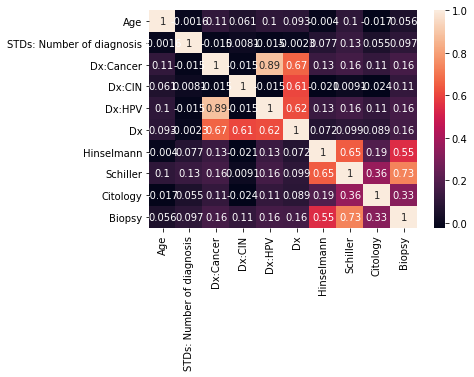

In [7]:
import seaborn as sns
sns.heatmap(dataset.corr(), annot=True)

In [8]:
le = LabelEncoder()
le.fit(dataset['Biopsy'])
allClasses = le.transform(dataset['Biopsy'])
allFeatures = dataset.drop(['Biopsy'], axis=1)


In [9]:

X_TrainAndTest, X_Validation, y_TrainAndTest, y_Validation = train_test_split(allFeatures,
                                                                              allClasses, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_TrainAndTest,
                                                    y_TrainAndTest, test_size=0.20, random_state=42)


In [10]:
#  fitness function

def FitnessEvaluate(individual, X_train, X_test, y_train, y_test):

    columns = [index for index in range(len(individual)) if individual[index] == 0]
    X_trainParsedValues = X_train.drop(X_train.columns[columns], axis=1)
    X_trainFeatures = pd.get_dummies(X_trainParsedValues)
    X_testParsedValues = X_test.drop(X_test.columns[columns], axis=1)
    X_testFeatures = pd.get_dummies(X_testParsedValues)

    sharedFeatures = set(X_trainFeatures.columns) & set(X_testFeatures.columns)
    removeFromTrain = set(X_trainFeatures.columns) - sharedFeatures
    removeFromTest = set(X_testFeatures.columns) - sharedFeatures
    
    X_trainFeatures = X_trainFeatures.drop(list(removeFromTrain), axis=1)
    X_testFeatures = X_testFeatures.drop(list(removeFromTest), axis=1)
      
    # Applying Logistic Regression 
    
    clf = LogisticRegression()
    
    clf.fit(X_trainFeatures, y_train)
    predictions = clf.predict(X_testFeatures)
    accuracy = accuracy_score(y_test, predictions)

    return (accuracy,)

In [11]:
#----------------- DEAP ( Distributed Evolutionary Algorithms in Python ) GLOBAL VARIABLES (can be viewable by SCOOP)-------------------------------
from deap import  tools, algorithms,creator, base

# Create the Individuals
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Creating  a Toolbox
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(dataset.columns) - 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

#  filling  toolbox
toolbox.register("evaluate", FitnessEvaluate, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [12]:
# The halloffame module provides a way to keep track of the best individuals that ever lived in the evolutionary process.

def HallOfFame():

    # Initialize the  variables 
    PopNum = 100
    GenNum = 10
    pop = toolbox.population(n=PopNum)
    hof = tools.HallOfFame(PopNum * GenNum)
    stats = tools.Statistics(lambda index : index.fitness.values)
    stats.register("Average", np.mean)
    stats.register("Standard Deviation", np.std)
    stats.register("Min", np.min)
    stats.register("Max", np.max)

    # Launching  genetic algorithm
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=GenNum, stats=stats, halloffame=hof, verbose=True)

    # Return the hall of fame
    return hof



In [13]:
def Metrics(hof):

    #  list of percentiles in the hall of fame
    percentileList = [i / (len(hof) - 1) for i in range(len(hof))]
    
    # Gathering  fitness data from each percentile
    testAccuracyList = []
    validationAccuracyList = []
    individualList = []
    for individual in hof:
        testAccuracy = individual.fitness.values
        validationAccuracy = FitnessEvaluate(individual, X_TrainAndTest, X_Validation, y_TrainAndTest, y_Validation)
        testAccuracyList.append(testAccuracy[0])
        validationAccuracyList.append(validationAccuracy[0])
        individualList.append(individual)
    testAccuracyList.reverse()
    validationAccuracyList.reverse()
    return testAccuracyList, validationAccuracyList, individualList, percentileList

In [14]:
if __name__ == '__main__':

#    First, we will apply logistic regression using all the features to get a Baseline accuracy.

    individual = [1 for i in range(len(allFeatures.columns))]
    
    testAccuracy = FitnessEvaluate(individual, X_train, X_test, y_train, y_test)
    
    validationAccuracy = FitnessEvaluate(individual, X_TrainAndTest, X_Validation, y_TrainAndTest, y_Validation)
    
    print('\nTest accuracy with all features: \t' + str(testAccuracy[0]))
    
    print('\nValidation accuracy with all features: ' + str(validationAccuracy[0]) + '\n')
    
    '''
    Now, we  apply the Genetic algorithm to choose a subset of features from the dataset 
 that gives a better accuracy than the baseline.
 
    '''
 
   
  
    
    HallofFame = HallOfFame()
    testAccuracyList, validationAccuracyList, individualList, percentileList = Metrics(HallofFame)

    # Get a list of subsets that performed best on validation data
    MaxValueAccuracySubsetIndicies = [index for index in range(len(validationAccuracyList)) 
                               if validationAccuracyList[index] == max(validationAccuracyList)]
    
    maxValueIndividuals = [individualList[index] for index in MaxValueAccuracySubsetIndicies]
    
    maxValueSubsets = [[list(allFeatures)[index] for index in range(len(individual))
                      if individual[index] == 1] for individual in maxValueIndividuals]

    
    print('\n---Optimal Feature Subset(s)---\n')
    for index in range(len(MaxValueAccuracySubsetIndicies)):
        
        print(' \n The  Percentile: \t\t\t' + str(percentileList[MaxValueAccuracySubsetIndicies[index]]))
        print(' \n The Validation Accuracy: \t\t' + str(validationAccuracyList[MaxValueAccuracySubsetIndicies[index]]))
        print(' \n Individual: \t' + str(maxValueIndividuals[index]))
        print(' \n Number of Features In Subset: \t' + str(len(maxValueSubsets[index])))
        print(' \n Feature Subset \n : ' + str(maxValueSubsets[index]))


Test accuracy with all features: 	0.9637681159420289

Validation accuracy with all features: 0.9476744186046512

gen	nevals	Average 	Standard Deviation	Min     	Max     
0  	100   	0.959203	0.00959454        	0.942029	0.978261
1  	60    	0.966594	0.0085676         	0.942029	0.978261
2  	55    	0.971957	0.00699979        	0.942029	0.978261
3  	69    	0.973913	0.00695048        	0.942029	0.978261
4  	61    	0.97558 	0.00611922        	0.949275	0.978261
5  	58    	0.977174	0.0034563         	0.963768	0.978261
6  	67    	0.977101	0.00393179        	0.949275	0.978261
7  	70    	0.976884	0.00431083        	0.949275	0.978261
8  	57    	0.976522	0.00513624        	0.949275	0.978261
9  	60    	0.976739	0.00359336        	0.963768	0.978261
10 	73    	0.976377	0.0054824         	0.949275	0.978261

---Optimal Feature Subset(s)---

 
 The  Percentile: 			0.3029259896729776
 
 The Validation Accuracy: 		0.9709302325581395
 
 Individual: 	[0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 